# Biometric Prediction on Keystroke Dynamics

This project takes a look at a biometric classifier with keystroke dynamics. Besides typing a password to validate a user, it is possible to discriminate users by their typing rhythms. This features can be used to detect impostors. This project is based on the data set of the publication _Killourhy, K. S., & Maxion, R. A. [Comparing anomaly detectors for keystroke dynamics.](http://www.cs.cmu.edu/%7Emaxion/pubs/KillourhyMaxion09.pdf) In Proc. of the Int. Conf. on Dependable Systems and Networks (DSN) (pp. 125-134)_. The objective is to build a classification baser on neural networks with the [keras](https://keras.io/) library.

The [data set](https://www.cs.cmu.edu/~keystroke/) consists of 51 subject each typing the password `.tie5Roanl` 400 times. The measures collected are the hold time (H), keydown-keydown time (DD) and keyup-keydown time (UD).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 
import utils

from minisom import MiniSom
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('data/DSL-StrongPasswordData.csv')
subject = df['subject']
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,2,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,2,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,2,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,2,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,2,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [3]:
df_data = df.drop(columns=['subject', 'sessionIndex', 'rep'])
X = df_data.iloc[:1200, :].values 
y = df["subject"].loc[:1199].values 
df_data.head(), X, y, X.shape, y.size

(   H.period  DD.period.t  UD.period.t     H.t  DD.t.i  UD.t.i     H.i  DD.i.e  \
 0    0.1491       0.3979       0.2488  0.1069  0.1674  0.0605  0.1169  0.2212   
 1    0.1111       0.3451       0.2340  0.0694  0.1283  0.0589  0.0908  0.1357   
 2    0.1328       0.2072       0.0744  0.0731  0.1291  0.0560  0.0821  0.1542   
 3    0.1291       0.2515       0.1224  0.1059  0.2495  0.1436  0.1040  0.2038   
 4    0.1249       0.2317       0.1068  0.0895  0.1676  0.0781  0.0903  0.1589   
 
    UD.i.e     H.e    ...        H.a  DD.a.n  UD.a.n     H.n  DD.n.l  UD.n.l  \
 0  0.1043  0.1417    ...     0.1349  0.1484  0.0135  0.0932  0.3515  0.2583   
 1  0.0449  0.0829    ...     0.1412  0.2558  0.1146  0.1146  0.2642  0.1496   
 2  0.0721  0.0808    ...     0.1621  0.2332  0.0711  0.1172  0.2705  0.1533   
 3  0.0998  0.0900    ...     0.1457  0.1629  0.0172  0.0866  0.2341  0.1475   
 4  0.0686  0.0805    ...     0.1312  0.1582  0.0270  0.0884  0.2517  0.1633   
 
       H.l  DD.l.Return 

In [12]:
# Feature Scaling 

from sklearn.preprocessing import MinMaxScaler, Normalizer

#sc = MinMaxScaler(feature_range = (0,1))
sc = Normalizer()
X = sc.fit_transform(X)

In [5]:
# Training the Data 

grid_x = 20 
grid_y = 20
sigma = 4.1

som = MiniSom(grid_x, grid_y, 31, sigma, learning_rate=.5, neighborhood_function='bubble', random_seed=10)
som.pca_weights_init(X)
print("Training...")
som.train_batch(X, 10000, verbose=True)
print("\n...Ready!")

C:\Users\vatsa\ML Projects\Keystroke Biometrics\keystroke-biometrics-master\minisom.py:151: UserWarning: sigma should be an integer when triangle or bubbleare used as neighborhood function
  'are used as neighborhood function')
C:\Users\vatsa\ML Projects\Keystroke Biometrics\keystroke-biometrics-master\minisom.py:293: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Training...
 [ 10000 / 10000 ] 100% 0.00252 it/s
...Ready!


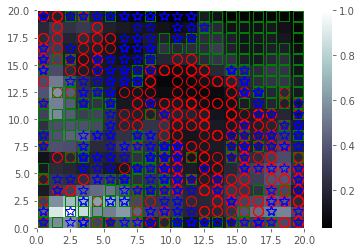

In [6]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()

# Subject 2 is a red circle, Subjecr 3 is a green circle
markers = ['o', 's', '*']
colors = ['r', 'g', 'b']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5, 
         markers[y[i]-2],
         markeredgecolor = colors[y[i]-2], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 1)
plt.savefig("clustering_3.png")
show()

## Activations Frequencies 

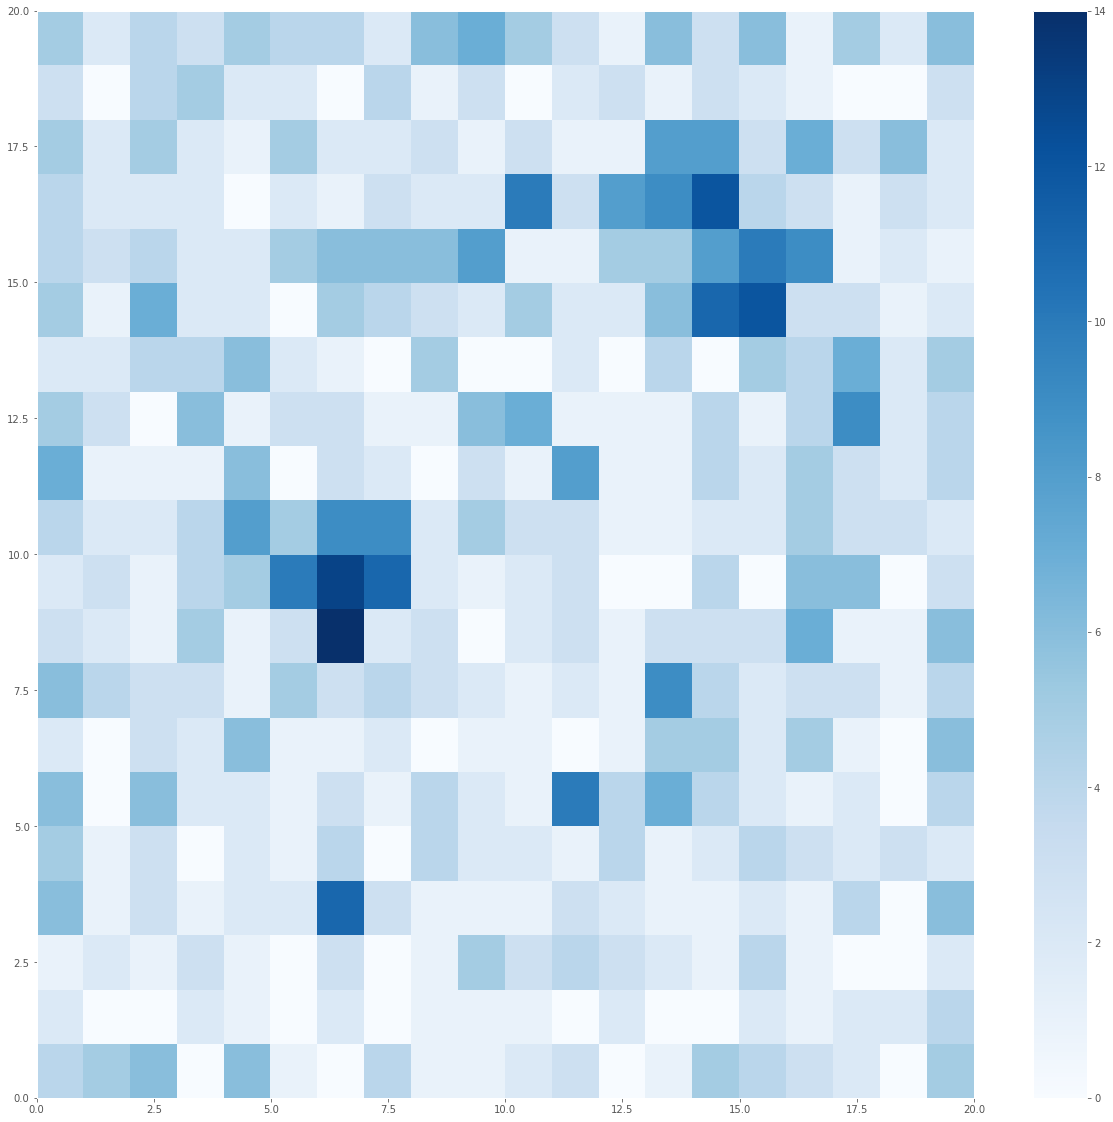

In [7]:
plt.figure(figsize=(grid_x+1, grid_y))
frequencies = np.zeros((grid_x, grid_y))
for position, values in som.win_map(X).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

## Class Pies 

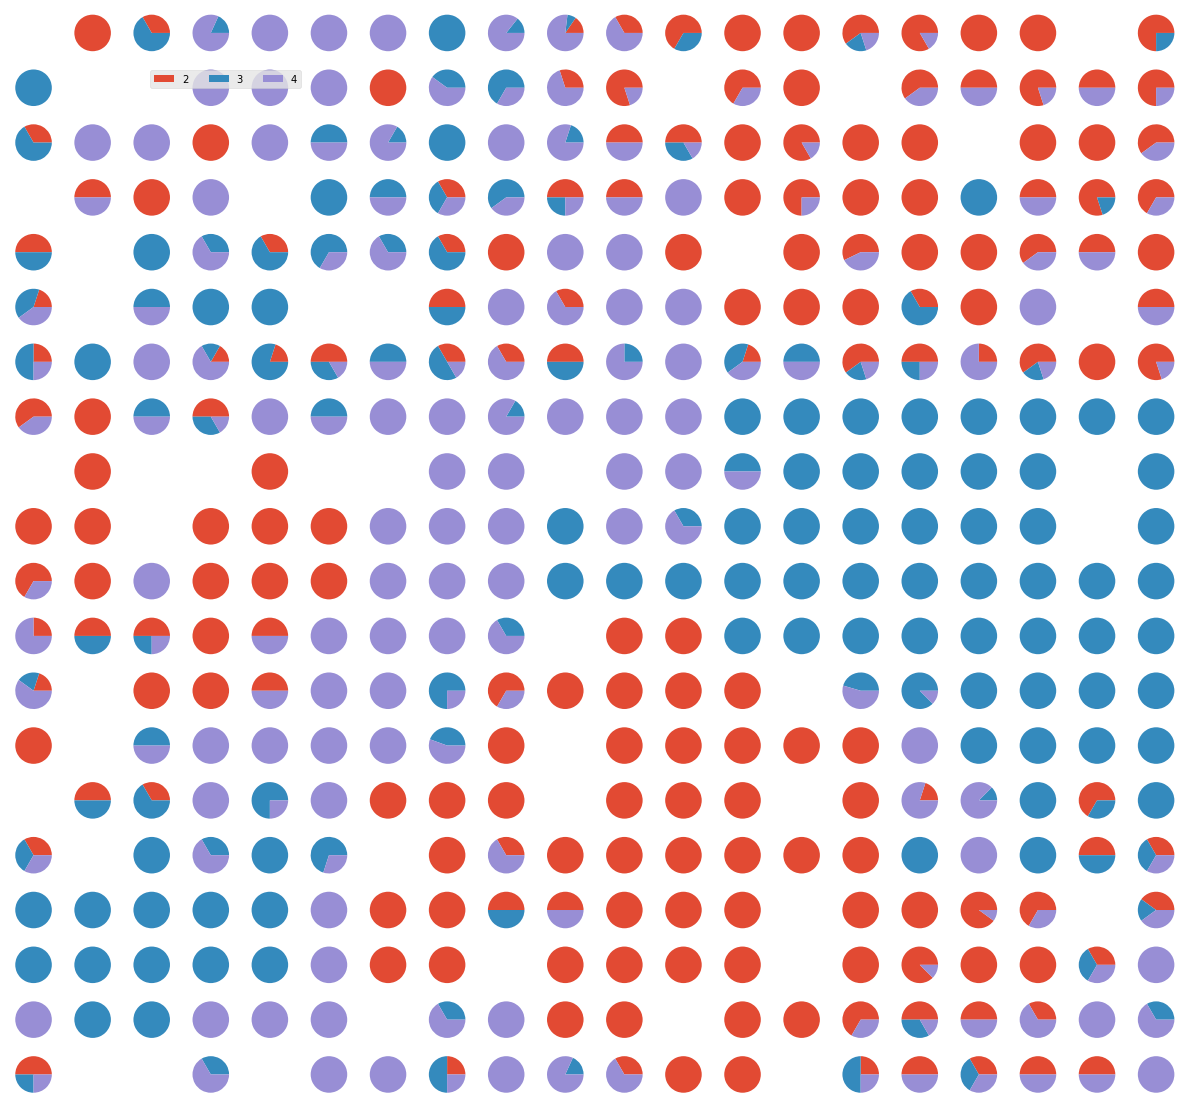

In [8]:
labels_map = som.labels_map(X, y)
label_names = np.unique(y)
                        
plt.figure(figsize=(grid_x+1, grid_y))
the_grid = GridSpec(grid_x, grid_y)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 19), ncol=3)
plt.savefig('som_keystroke_pies.png')
plt.show()

## Quantization Error 

In [ ]:
import sys

grid_x = 20 
grid_y = 20
sigma = 4.1
neighborhood_function='bubble'

som = MiniSom(grid_x, grid_y, 31, sigma, learning_rate=0.5, 
              neighborhood_function='bubble', random_seed=10)
som.pca_weights_init(X)
max_iter = 20000
q_error_pca_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(X))
    som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som.quantization_error(X)
        q_error_pca_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')
        
plt.plot(iter_x, q_error_pca_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')

C:\Users\vatsa\ML Projects\Keystroke Biometrics\keystroke-biometrics-master\minisom.py:151: UserWarning: sigma should be an integer when triangle or bubbleare used as neighborhood function
  'are used as neighborhood function')
C:\Users\vatsa\ML Projects\Keystroke Biometrics\keystroke-biometrics-master\minisom.py:293: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


iteration=11899 status=59.50% error=0.15078165014479278

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()

# Subject 2 is a red circle, Subjecr 3 is a green circle
markers = ['o', 's', '*']
colors = ['r', 'g', 'b']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5, 
         markers[y[i]-2],
         markeredgecolor = colors[y[i]-2], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 1)
plt.savefig("clustering_normalized_{}_{}.png".format(grid_x, sigma, 
                                                     neighborhood_function))
show()